# <center>chap9.2 Gaussian Mixtures</center>
---

A **<font color='red'>Gaussian mixture model (GMM)</font>** is a **probabilistic model** that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.

**<font color='crimson'>All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid (椭圆形). Each cluster can have a different ellipsoidal shape, size, density, and orientation.</font>**

When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you don't know what the parameters of these distributions are.

<Br>

There are several GMM variants. In the <font color='crimson'>simplest variant</font>, implemented in the **`GaussianMixture`** class, you **must know in advance the number *k* of Gaussian distributions**. The dataset $X$ is assumed to have been generated through the following probabilistic process:

- For each instance, a cluster is picked randomly from among $k$ clusters. The probability of choosing the $j^{th}$ cluster is defined by the cluster's weight $\phi^{j}$. The index of the cluster chosen for the $i^{th}$ instance is noted $z^i$.

|$k$|1|2|3|...|k|
|:--| -- | -- | -- | -- | -- |
|$p$|$\phi^{1}$|$\phi^{2}$|$\phi^{3}$|...|$\phi^{k}$|

|$X$|$X_1$|$X_2$|$X_3$|...|$X_m$|comment|
|:--| -- | -- | -- | -- | -- ||
|cluster|$z^1$|$z^2$|$z^3$|...|$z^m$|$z^i\in\{1, 2, 3, ..., k\}$|

- If $z^i=j$, meaning the $i^{th}$ instance has been assigned to the $j^{th}$ cluster, the location $i^{th}$ of this instance is sampled randomly from the Gaussian distribution with mean $\mu^{i}$ and covariance matrix $\sum^{j}$. This is noted $\textbf{x}^{i} \sim N(\mu^j, \sum^j)$.

The generative process can be represented as a graphical model.

![xx](../figs/chap09-figs/gaussian-mixture-model-graph.png)
<center><i>a graph of Gaussian mixture model, including its parameters (squares), random variable (circles), and their conditional dependencies (solid arrows)</i></center>


  - 圆圈——随机变量；
  - 正方形——固定值（即模型的参数）；
  - 大矩形——plate，表示其中的内容重复多次；
  - 每个矩形（plate）右下角的数字——表示里面内容可重复的次数。如，有 m 个随机变量 $z^i$ （从 $z^1$ 到 $z^m$）、m 个随机变量 $x^i$。同时，这里有 k 个均值 $\mu^j$ 和 k 个协方差矩阵（covariance matrix）$\sum^j$。最后，这里只有一个权重向量 $\phi$（包含所有权重，从 $\phi^1$ 到 $\phi^k$）。
  - 每个变量 $z^i$ 来自权重 $\phi$ 的 categorical distribution。每个变量 $x^i$ 来自 normal distribution，其均值和协方差矩阵由其 cluster $z^i$ 决定。
  - 实线箭头——表示条件依赖（conditional dependencies）。如，每个随机变量 $z^i$ 的概率分布依赖于权重向量 $\phi$。如果箭头穿过 plate 边界，则表示对于 plate 的每次重复都有这种依赖。如，权重向量 $\phi$ 决定了所有随机变量 $x^i$ 的概率分布。
  - $z^i$ 到 $x^i$ 的波浪线——表示一个 switch：根据 $z^i$ 的值，实例 $x^i$ 将从不同的 gaussian distribution 中抽样。如，若 $z^i=j$，则 $\textbf{x}^{i} \sim N(\mu^j, \sum^j)$。
  - 阴影节点（shaded node）——表明这个值已知。所以，在这种情况下，只有随机变量 $x^i$ 是已知的：他们被称为 <font color='red'>observed variables</font>。未知的随机变量 $z^i$ 被称为 <font color='red'>latent variables</font>。

In [1]:
# Common imports
import os
import sys
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
# warnings.filterwarnings(action='ignore', message="^internal gelsd")

In [2]:
print('python version:', sys.version_info)
print('matplotlib version:', mpl.__version__)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sklearn.__version__)

python version: sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib version: 3.1.2
numpy version: 1.18.1
pandas version: 1.0.1
scikit-learn version: 0.22.1


Given the dataset $X$, you typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^i$ to $\mu^k$, and $\sum^i$ to $\sum^k$.

In [3]:
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs

x1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
x1 = x1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
x2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
x2 = x2 + [6, -8]
x = np.r_[x1, x2]
y = np.r_[y1, y2]

x.shape, y.shape

((1250, 2), (1250,))

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [6]:
# The weights of each mixture components.
gm.weights_  # shape: (n_components,)

array([0.39032584, 0.20961444, 0.40005972])

In [7]:
# The mean of each mixture component.
gm.means_    # shape: (n_components, n_features)

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [8]:
# The covariance of each mixture component.
# The shape depends on `covariance_type`.
gm.covariances_   # covariance_type='full'`

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

|`covariance_type`|comment|attribute `covariances_`'s shape|
| : -- | :-- | :--- |
|'spherical'|Each component has its own general covariance matrix.|(n_components,)|
|'tied'|All components share the same general covariance matrix.|(n_features, n_features)|
|'diag'|Each component has its own diagonal covariance matrix.|(n_components, n_features)|
|'full'|Each component has its own single variance.|(n_components, n_features, n_features)|

In [9]:
250 / 1250, 500 / 1250, 500 / 1250

(0.2, 0.4, 0.4)

It worked fine! The weights that were used to generate the data were 0.2, 0.4 and 0.4. And, the means and covariance matrices were very close to those found by the algorithm.

**<font color='crimson'>This class relies on the Expectation Maximization (EM) algorithm</font>**, which has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence.

- 1st, assigning instances to clusters (this is called the <font color='red'>expectation step</font>),
- 2nd, updating the clusters (this is called the <font color='red'>maximization step</font>).

[The main difficulty in learning Gaussian mixture models from unlabeled data is that it is one usually doesn’t know which points came from which latent component ($z^i$, if one has access to this information it gets very easy to fit a separate Gaussian distribution to each set of points). Expectation-maximization is a well-founded statistical algorithm to get around this problem by an iterative process. First one assumes random components (randomly centered on data points, learned from k-means, or even just normally distributed around the origin) and computes for each point a probability of being generated by each component of the model. Then, one tweaks the parameters to maximize the likelihood of the data given those assignments. Repeating this process is guaranteed to always converge to a local optimum.](https://scikit-learn.org/stable/modules/mixture.html#estimation-algorithm-expectation-maximization)

<font color='crimson'>In the context of clustering, you can think of EM as a generalization of K-Means</font> that not only **finds the cluster centers** ($\mu^1$ to $\mu^k$), but also **their size, shape, and orientation** ($\sum^1$ to $\sum^k$), as well as their relative weights ($\phi^1$ to $\phi^k$).

**Unlike K-Means, EM uses soft cluster assignments, not hard assignments.**

For each instance,

- **during the expectation step**, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters).

- Then, **during the maximization step**, each cluster is updated using *all* the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the <font color='red'>responsibilities</font> of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

<br>

<div class="alert alert-block alert-danger">
    <center><b>WARNING</b></center><br>
    Just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why <code>n_init</code> is set to 10 (default is 1).
</div>

In [10]:
# Check whether or not the algorithm converged.
# True when convergence was reached in fit(), False otherwise.
gm.converged_

True

In [11]:
# Check how many iterations it took
# Number of step used by the best fit of EM to reach the convergence
gm.n_iter_

4

Now, **you have an estimate of the location, size, shape, orientation, and relative weight of each cluster**, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering).

In [12]:
# soft clustering for new instances
gm.predict_proba(x)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

In [13]:
# hard clustering for new instances
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1])

<font color='crimson'>A Gaussian mixture model is a generative model, meaning you can sample new instances from it</font> (note that they are ordered by the cluster index):

In [14]:
# Generate random samples from the fitted Gaussian distribution
x_new, y_new = gm.sample(n_samples=6)  # number of samples to generate

In [15]:
x_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [16]:
y_new

array([0, 0, 1, 1, 1, 2])

You can use **`score_samples()`** method to <font color='crimson'>estimate the density of the model at any given location</font>: for each given instance, this method estimates the log of the <font color='red'>probability density function (PDF)</font> at that location.

In [17]:
# Compute the weighted log probabilities for each sample
gm.score_samples(x)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

<font color='crimson'>The greater the score, the higher the density.</font>

You can <font color='crimson'>get the value of the PDF at the location of the given instances</font> by computing the exponential of these scores.

In [18]:
# Get the value of the PDF at the location
np.exp(gm.score_samples(x))

array([0.07369141, 0.02812925, 0.03578544, ..., 0.02978959, 0.01230275,
       0.02220896])

These (PDF) are **not probabilities, but probability densities**: they can take on any positive values, not just a value between 0 and 1. To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1).

<font color='crimson'>Check that the PDF integrates to 1 over the whole space:</font>
  1. take a large square around the clusters
  2. chop the square into a grid of tiny squares
  3. compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square)
  4. sum all theses probabilities

In [23]:
# Integate the PDF over the entire space of possible instance locations
resolution = 100
grid = np.arange(-10, 10, 1/resolution)
xx, yy = np.meshgrid(grid, grid)
x_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(x_full))
pdf_probas = pdf * (1/resolution)**2
pdf_probas.sum()

0.9999999999225099

In [24]:
from matplotlib.colors import LogNorm

In [27]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    """
    Show the cluster means, the decision boundaries (dashed lines), and the
    density contours of the clusterer.
    """
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

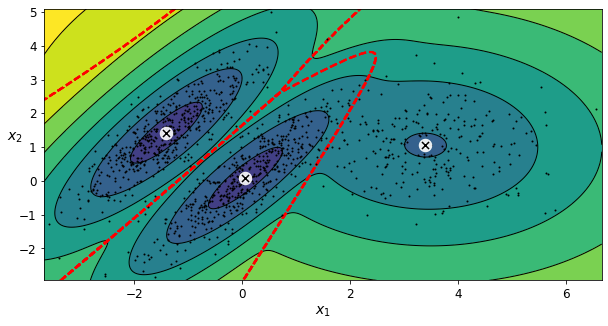

In [29]:
plt.figure(figsize=(10, 5))
plot_gaussian_mixture(gm, x)
plt.show()

Great!

**<font color='crimson'>Where there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution.</font>**

You might need to **reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn**. One way to do this is to **limit the range of shapes and orientations (方向) that the clusters can have**. This can be achieved by imposing (强制实行) constraints on the covariance matrices. To do this, set the `covariance_type` hyperparameter to one of the following values:

- `'full'` (default): no constraints, each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix). covariance shape: `(n_components, n_features, n_features)`.



- `'spherical'`: all clusters must be spherical (球形的), but they can have different diameters(直径) (i.e., different variances). covariance shape: `(n_components,)`.


- `'diag'`: clusters take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal). covariance shape: `(n_components, n_features)`.


- `'tied'`: all clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix). covariance shape: `(n_components, n_features)`.

In [30]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type='full',
                          random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied',
                          random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag',
                          random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type='spherical', random_state=42)
gm_full.fit(x)
gm_tied.fit(x)
gm_diag.fit(x)
gm_spherical.fit(x)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

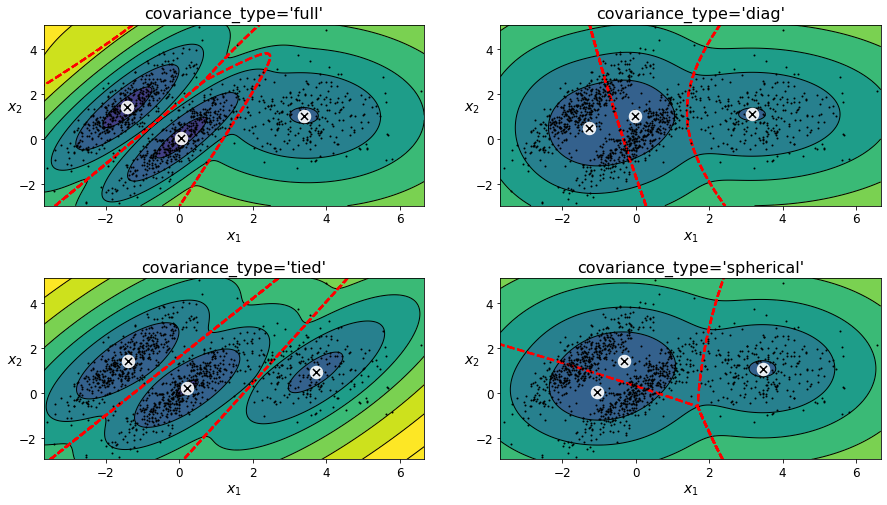

In [36]:
# Compare gaussian mixtures
plt.figure(figsize=(15, 8))

plt.subplot(221)
plot_gaussian_mixture(gm_full, x)
plt.title("covariance_type='full'", fontsize=16)

plt.subplot(222)
plot_gaussian_mixture(gm_diag, x)
plt.title("covariance_type='diag'", fontsize=16)

plt.subplot(223)
plot_gaussian_mixture(gm_tied, x)
plt.title("covariance_type='tied'", fontsize=16)

plt.subplot(224)
plot_gaussian_mixture(gm_spherical, x)
plt.title("covariance_type='spherical'", fontsize=16)

plt.subplots_adjust(hspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
    <center><b>Computational complexity of <code>GaussianMixture</code> model</b></center><br>
It depends on the number of instances $m$, the number of dimensions $n$, the number of clusters $k$, and the constraints on the covariance matrices.

If <code>covariance_type</code> is <code>"spherical"</code> or <code>"diag"</code>, it is $O(kmn)$, assuming the data has a clustering structure.

If <code>covariance_type</code> is <code>"tied"</code> or <code>"full"</code>, it is $O(kmn^2+kn^3)$, so it will not scale the large numbers of features.
</div>

## 1. Anomaly detection using Gaussian Mixtures